In [1]:
!pip install category_encoders eli5 scipy pdpbox plotly==4.1.0
#!pip install shap
#!pip install xgboost
# !pip install xlrd
#!pip install seaborn
#!pip install --force-reinstall numpy==1.2.4
# !pip install ipykernel

In [2]:
# see installed packages
import sys
sys.path

['/Users/elliotgunn/Desktop/Lambda/toronto-subway-delay/notebooks',
 '/Users/elliotgunn/.local/share/virtualenvs/toronto-subway-delay-FRXWoISF/lib/python37.zip',
 '/Users/elliotgunn/.local/share/virtualenvs/toronto-subway-delay-FRXWoISF/lib/python3.7',
 '/Users/elliotgunn/.local/share/virtualenvs/toronto-subway-delay-FRXWoISF/lib/python3.7/lib-dynload',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '',
 '/Users/elliotgunn/.local/share/virtualenvs/toronto-subway-delay-FRXWoISF/lib/python3.7/site-packages',
 '/Users/elliotgunn/.local/share/virtualenvs/toronto-subway-delay-FRXWoISF/lib/python3.7/site-packages/IPython/extensions',
 '/Users/elliotgunn/.ipython']

In [3]:
# the python path and the executable used by the notebook must match for package installation
!type python


python is /Users/elliotgunn/.local/share/virtualenvs/toronto-subway-delay-FRXWoISF/bin/python


In [4]:
sys.executable

'/Users/elliotgunn/.local/share/virtualenvs/toronto-subway-delay-FRXWoISF/bin/python3'

In [5]:
# update all packages
# conda update --all

## Research

https://www.sciencedirect.com/science/article/pii/S0968090X18311021

https://academic.oup.com/tse/advance-article/doi/10.1093/tse/tdy001/5306170

## Import multiple files from directory and `concat` into single df

Example: 

https://stackoverflow.com/questions/20908018/import-multiple-excel-files-into-python-pandas-and-concatenate-them-into-one-dat
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe


In [6]:
import os
import pandas as pd

# list files
path = os.getcwd()
files = os.listdir(path)
files

['Subway_&_SRT_Logs_December_2018.xlsx',
 'feature engineering.ipynb',
 'Subway_&_SRT_Logs_May2019.xlsx',
 'Subway_&_SRT_Logs_(August_2018).xlsx',
 '.DS_Store',
 'Subway_SRT_Logs(October 2018).xlsx',
 'Subway_&_SRT_Logs_(September_2018).xlsx',
 'Subway_&_SRT_Logs_(December_2017).xlsx',
 'Subway_&_SRT_Logs_February2019.xlsx',
 'SubwaySRTLogs201710.xlsx',
 'Subway&SRT_Logs_April_2018.xlsx',
 'meta data',
 'SubwaySRTLogs201707.xlsx',
 'Subway & SRT Logs (May 2017).xlsx',
 'Subway_SRT_Logs(January 2018).xlsx',
 'Subway&SRT_Logs_May_2018.xlsx',
 'Subway_&_SRT_Logs_November_2018.xlsx',
 'Subway&SRT_Logs_February_2018.xlsx',
 'weatherstats_toronto_normal_daily.csv',
 'README.md',
 'SubwaySRTLogs201708.xlsx',
 'Subway_&_SRT_Logs_(November_2017).xlsx',
 'Subway&SRT_Logs_March_2018.xlsx',
 'Subway_SRT_Logs(June2018).xlsx',
 'SubwaySRTLogs201709.xlsx',
 '.ipynb_checkpoints',
 'Subway_&_SRT_Logs_April2019.xlsx',
 'Subway_&_SRT_Logs_January_2019.xlsx',
 'Subway & SRT Logs (Jan01_14 to April30_17).x

In [7]:
# Pick out 'xls' files
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
files_xlsx

['Subway_&_SRT_Logs_December_2018.xlsx',
 'Subway_&_SRT_Logs_May2019.xlsx',
 'Subway_&_SRT_Logs_(August_2018).xlsx',
 'Subway_SRT_Logs(October 2018).xlsx',
 'Subway_&_SRT_Logs_(September_2018).xlsx',
 'Subway_&_SRT_Logs_(December_2017).xlsx',
 'Subway_&_SRT_Logs_February2019.xlsx',
 'SubwaySRTLogs201710.xlsx',
 'Subway&SRT_Logs_April_2018.xlsx',
 'SubwaySRTLogs201707.xlsx',
 'Subway & SRT Logs (May 2017).xlsx',
 'Subway_SRT_Logs(January 2018).xlsx',
 'Subway&SRT_Logs_May_2018.xlsx',
 'Subway_&_SRT_Logs_November_2018.xlsx',
 'Subway&SRT_Logs_February_2018.xlsx',
 'SubwaySRTLogs201708.xlsx',
 'Subway_&_SRT_Logs_(November_2017).xlsx',
 'Subway&SRT_Logs_March_2018.xlsx',
 'Subway_SRT_Logs(June2018).xlsx',
 'SubwaySRTLogs201709.xlsx',
 'Subway_&_SRT_Logs_April2019.xlsx',
 'Subway_&_SRT_Logs_January_2019.xlsx',
 'Subway & SRT Logs (Jan01_14 to April30_17).xlsx',
 'Subway_&_SRT_Logs_March2019.xlsx',
 'SubwayDelay201706.xlsx',
 'Subway_SRT_Logs(July_2018).xlsx']

In [8]:
# initialize empty dataframe
df = pd.DataFrame()

# loop over list of files to append to empty dataframe

for f in files_xlsx:
    data = pd.read_excel(f)
    df = df.append(data)

df.shape

(110909, 10)

In [9]:
df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2018-12-01,00:11,Saturday,YONGE BD STATION,SUDP,0,0,NaN,BD,0
1,2018-12-01,01:13,Saturday,DUNDAS WEST STATION,SUAP,0,0,W,BD,5339
2,2018-12-01,01:35,Saturday,SHEPPARD STATION,EUSC,0,0,N,YU,5651
3,2018-12-01,01:46,Saturday,DUNDAS WEST STATION,SUO,4,8,W,BD,5339
4,2018-12-01,01:51,Saturday,WOODBINE STATION,SUDP,0,0,NaN,BD,0


In [10]:
# weather data obtained from https://www.weatherstats.ca/faq/#download-columns-ne
# merge with weather.csv
weather = pd.read_csv('weatherstats_toronto_normal_daily.csv')

# keep _v: max, min, or mean
weather = weather.loc[:, ['date','max_dew_point_v', 'max_relative_humidity_v',
                          'max_temperature_v', 'max_wind_speed_v', 'min_dew_point_v',
                         'min_relative_humidity_v', 'min_temperature_v',
                         'min_wind_speed_v', 'precipitation_v', 'rain_v',
                         'snow_v', 'snow_on_ground_v']]

# change Date to datetime format
weather['date'] = pd.to_datetime(weather['date'], infer_datetime_format=True)
weather.rename(columns={'date': 'Date'}, inplace=True)

weather.head(2)
df.shape, weather.shape

((110909, 10), (2064, 13))

In [11]:
# merge with df on 'Date'

df = pd.merge(df, weather, how='left', on='Date')

df.shape

(110909, 22)

In [12]:
df.head(2)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,max_temperature_v,max_wind_speed_v,min_dew_point_v,min_relative_humidity_v,min_temperature_v,min_wind_speed_v,precipitation_v,rain_v,snow_v,snow_on_ground_v
0,2018-12-01,00:11,Saturday,YONGE BD STATION,SUDP,0,0,NaN,BD,0,...,4.57,29.82,-5.91,62.12,-2.46,5.65,2.06,1.65,0.44,0.6
1,2018-12-01,01:13,Saturday,DUNDAS WEST STATION,SUAP,0,0,W,BD,5339,...,4.57,29.82,-5.91,62.12,-2.46,5.65,2.06,1.65,0.44,0.6


In [13]:
## Deal with missing values

df.isnull().sum().sort_values(ascending=False)

# notice that only Bound, Line, Code have missing values...

df.Bound.value_counts(dropna=False)

NaN    24048
W      23383
S      22420
E      21603
N      19406
B         45
Y          2
5          1
R          1
Name: Bound, dtype: int64

In [14]:
# Line needs to be cleaned up

df.Line.value_counts(dropna=False)

BD                        52177
YU                        49488
SRT                        4067
SHP                        3589
YU/BD                       992
NaN                         438
B/D                          62
YU/ BD                       12
YU / BD                       9
BD LINE                       6
BD/YU                         6
BD/YUS                        5
YUS                           5
999                           4
YU - BD                       3
YU-BD                         3
11 BAYVIEW                    2
16 MCCOWAN                    2
510 SPADINA                   2
555                           1
37 ISLINGTON                  1
504 KING                      1
60 STEELES WEST               1
341 KEELE                     1
BLOOR DANFORTH LINES          1
126 CHRISTIE                  1
32 EGLINTON WEST              1
504                           1
9 BELLAMY                     1
SHEPPARD                      1
95 YORK MILLS                 1
YU\BD   

## wrangle + train/val/test

**Feature engineering approaches:**

> But Stockholmståg has found a way to use that data to also predict the ripple effect a single delay has on its entire system. An accident somewhere along its route means a train will be delayed before it rolls into the next station. But that also affects the train behind it, and the train behind it, and so forth. Eventually a single incident can throw off the scheduling of an entire commuter system, even if the original source of the disruption has already been resolved. [link](https://gizmodo.com/a-new-algorithm-can-predict-subway-delays-two-hours-bef-1729539784)

Leakage: 
Possibly with `Min Gap`: Time length (in minutes) between trains


In [15]:
def wrangle(X):
  
    X = X.copy()
    
    # drop min gap
    # X = X.drop(columns=['Min Gap'], axis=1)

    # unique id for each row
    X['index_col'] = X.index

    # Convert 'Date' to datetime
    X['Date'] = pd.to_datetime(X['Date'], infer_datetime_format=True)
  
    # Extract components from 'Date', then drop original column
    X['year'] = X['Date'].dt.year
    X['month'] = X['Date'].dt.month
    X['day'] = X['Date'].dt.day
    X = X.drop(columns='Date')
  
    # 'Time' is a timestamp: we have hour and minute information
    # Extract components from 'Time', then drop original column
    X['Time'] = pd.to_datetime(X['Time'], infer_datetime_format=True)
    X['hour'] = X['Time'].dt.hour
    X['minute'] = X['Time'].dt.minute
    X = X.drop(columns='Time')
        
    # weekend vs weekday
    for day in df['Day']:
        if day == ('Saturday' or 'Sunday'):
            df['Weekday'] = 1
        else:
            df['Weekday'] = 0  
 
    # Return wrangled dataframe
    return X

df = wrangle(df)

In [16]:
df.head()
df['year'].value_counts()

2015    21474
2016    21162
2018    20737
2014    20424
2017    18885
2019     8227
Name: year, dtype: int64

In [17]:
train = df[df['year'] < 2018]
val = df[df['year'] == 2018]
test = df[df['year'] == 2019]

train.shape, val.shape, test.shape

((81945, 26), (20737, 26), (8227, 26))

In [18]:
# arrange data into X features matrix and y target vector
target = 'Min Delay'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test
y_test = test[target]

In [19]:
df.dtypes

Day                         object
Station                     object
Code                        object
Min Delay                    int64
Min Gap                      int64
Bound                       object
Line                        object
Vehicle                      int64
max_dew_point_v            float64
max_relative_humidity_v    float64
max_temperature_v          float64
max_wind_speed_v           float64
min_dew_point_v            float64
min_relative_humidity_v    float64
min_temperature_v          float64
min_wind_speed_v           float64
precipitation_v            float64
rain_v                     float64
snow_v                     float64
snow_on_ground_v           float64
index_col                    int64
year                         int64
month                        int64
day                          int64
hour                         int64
minute                       int64
dtype: object

## Exploratory Visualizations

In [20]:
# recombine features and labels for exploratory data analysis

y = train[target]
train_copy = train.copy()
train_copy['Min Delay'] = y

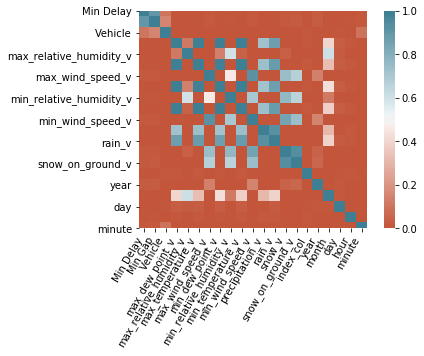

CPU times: user 697 ms, sys: 188 ms, total: 885 ms
Wall time: 749 ms


In [40]:
%%time
# pairplot 

import seaborn as sns
import matplotlib.pyplot as plt

# too many columns
# sns.pairplot(train_copy)
# plt.show()

corr = df.corr()
ax = sns.heatmap(corr, vmin=0, vmax=1, cmap=sns.diverging_palette(20, 220, n=200),
                square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right'
)

plt.show();

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [22]:
# get cardinality
for col in sorted(train_copy.columns):
    print(col, train_copy[col].nunique())

Bound 7
Code 201
Day 7
Line 45
Min Delay 146
Min Gap 136
Station 333
Vehicle 974
day 31
hour 24
index_col 81945
max_dew_point_v 1033
max_relative_humidity_v 723
max_temperature_v 1097
max_wind_speed_v 632
min_dew_point_v 1054
min_relative_humidity_v 1026
min_temperature_v 1103
min_wind_speed_v 361
minute 60
month 12
precipitation_v 190
rain_v 240
snow_on_ground_v 75
snow_v 105
year 4


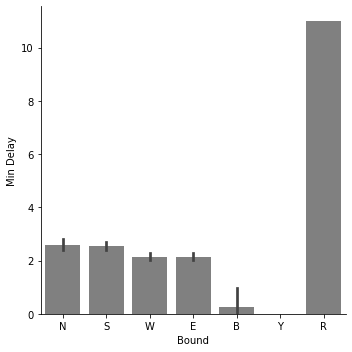

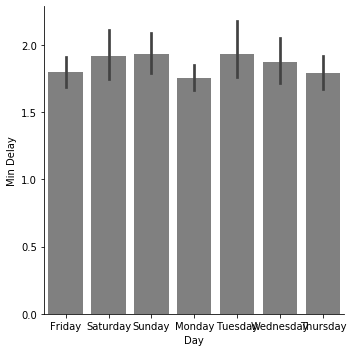

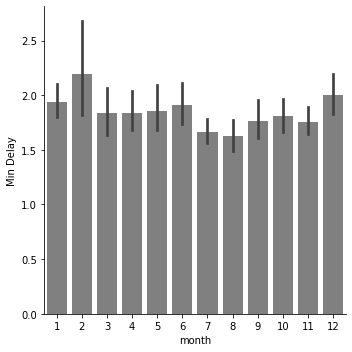

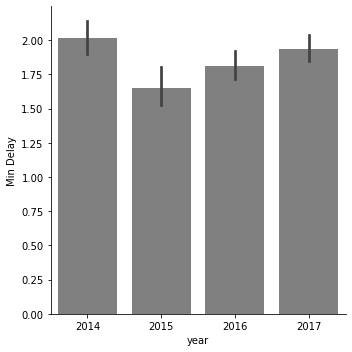

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in sorted(train_copy.columns):
  if train_copy[col].nunique() < 15:
    sns.catplot(x=col, y='Min Delay', data=train_copy, kind='bar', color='grey')
    plt.show()

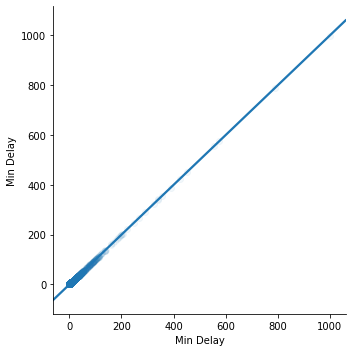

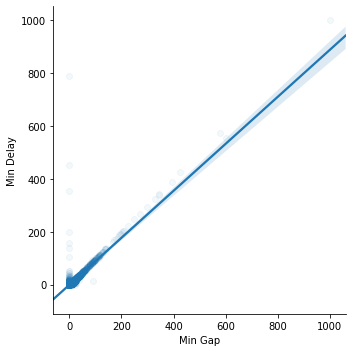

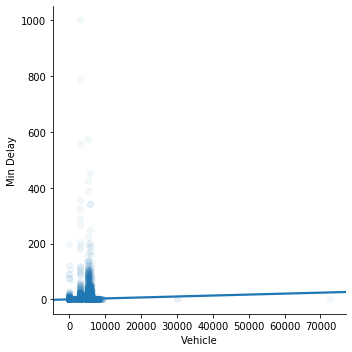

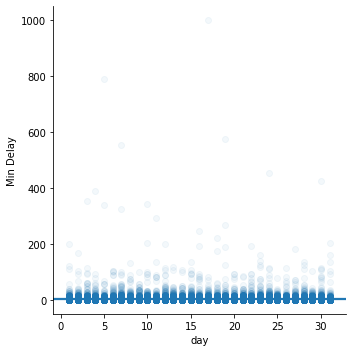

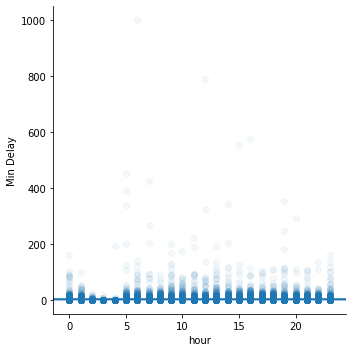

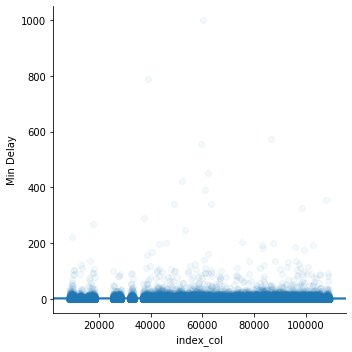

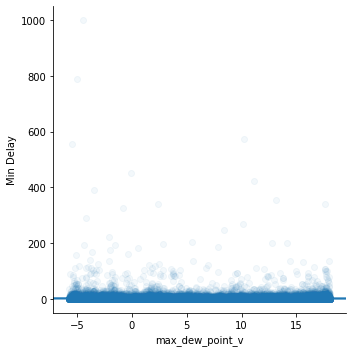

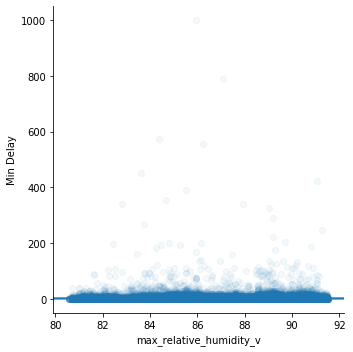

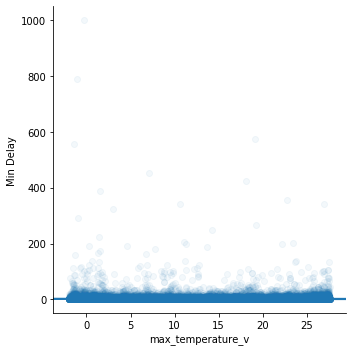

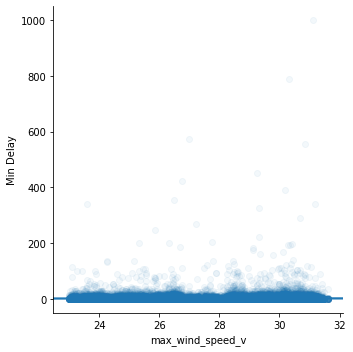

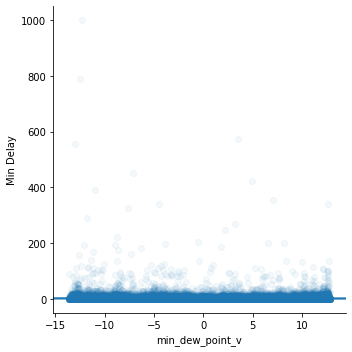

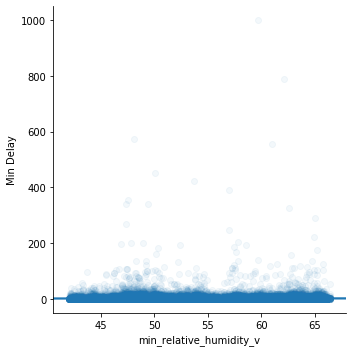

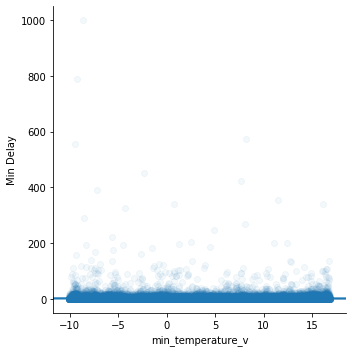

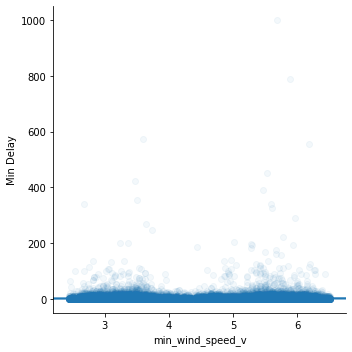

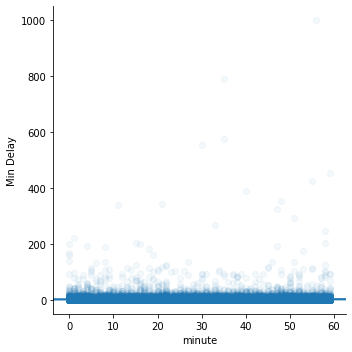

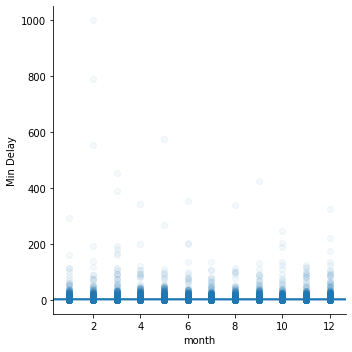

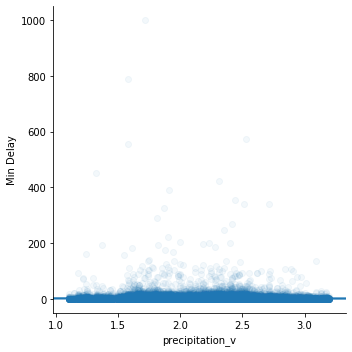

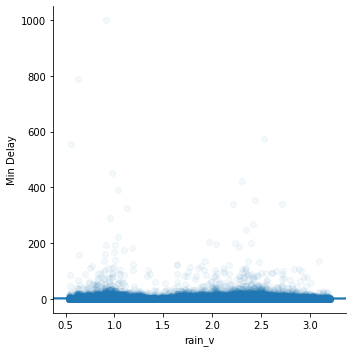

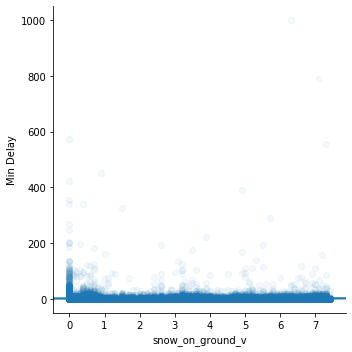

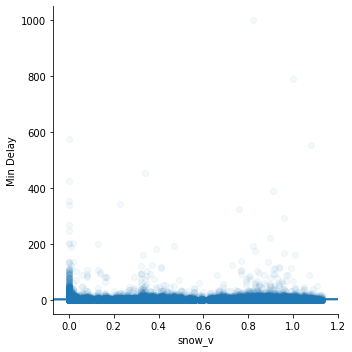

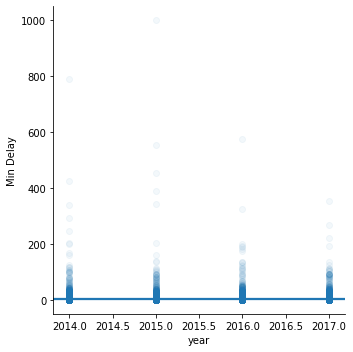

In [24]:
numeric = train_copy.select_dtypes('number')
for col in sorted(numeric.columns):
  sns.lmplot(x=col, y='Min Delay', data=train_copy, scatter_kws=dict(alpha=0.05))
  plt.show();

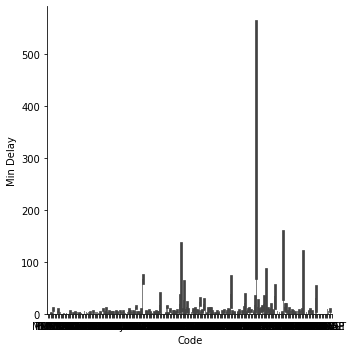

In [25]:
# Code and Min Delay

sns.catplot(x='Code', y='Min Delay', data=train, kind='bar', color='grey')
plt.show()

In [26]:
df.Code.value_counts()

MUSC     17932
TUSC     12991
MUPAA     7320
MUIS      6796
MUGD      4961
         ...  
ETCA         1
PUSIC        1
SFAP         1
PUTN         1
PUSZC        1
Name: Code, Length: 214, dtype: int64

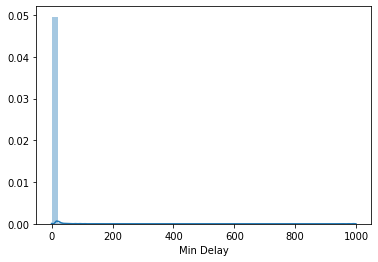

In [27]:
# histogram of Min Delay
# extreme right skew

sns.distplot(train_copy['Min Delay'])
plt.show();

In [28]:
train_copy['Min Delay'].describe()

count    81945.000000
mean         1.849179
std          8.559311
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        999.000000
Name: Min Delay, dtype: float64

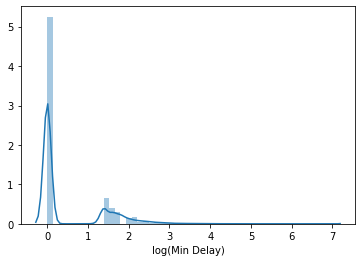

In [29]:
# log transform the target
import numpy as np

y = train_copy['Min Delay']
y_log = np.log1p(y)
train_copy['log(Min Delay)'] = y_log

# plot distribution of log-transformed target
sns.distplot(train_copy['log(Min Delay)']);


In [30]:
y_log.describe()

count    81945.000000
mean         0.497266
std          0.853578
min          0.000000
25%          0.000000
50%          0.000000
75%          1.386294
max          6.907755
Name: Min Delay, dtype: float64

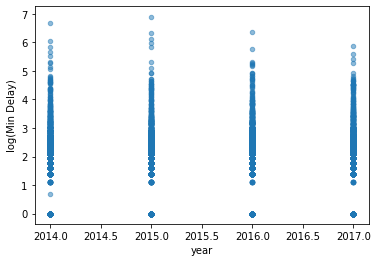

In [31]:
ax = train_copy.plot(x='year', y='log(Min Delay)', kind='scatter', alpha=0.5)


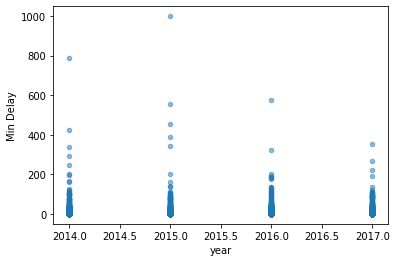

In [32]:
ax = train_copy.plot(x='year', y='Min Delay', kind='scatter', alpha=0.5)


## Baseline

In [33]:
print('Delay, mean:', train['Min Delay'].mean())
print('Delay, mode:', train['Min Delay'].mode())
print('Delay, median:', train['Min Delay'].median())

Delay, mean: 1.849179327597779
Delay, mode: 0    0
dtype: int64
Delay, median: 0.0


In [34]:
# majority class baseline: mode as distribution is extremely skewed

majority_class = train['Min Delay'].mode()
pred = [majority_class] * len(train['Min Delay'])

# use metric: mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(train['Min Delay'], pred)

76.68037098053573

## Pipeline

In [35]:
%%time
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), # trees work better with ordinal encoding
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)

print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.854825248122231
CPU times: user 1min 49s, sys: 1.03 s, total: 1min 51s
Wall time: 36.3 s


## Eval metric

In [36]:
# generate predicted
y_pred = pipeline.predict(X_val)

## Feature Importances


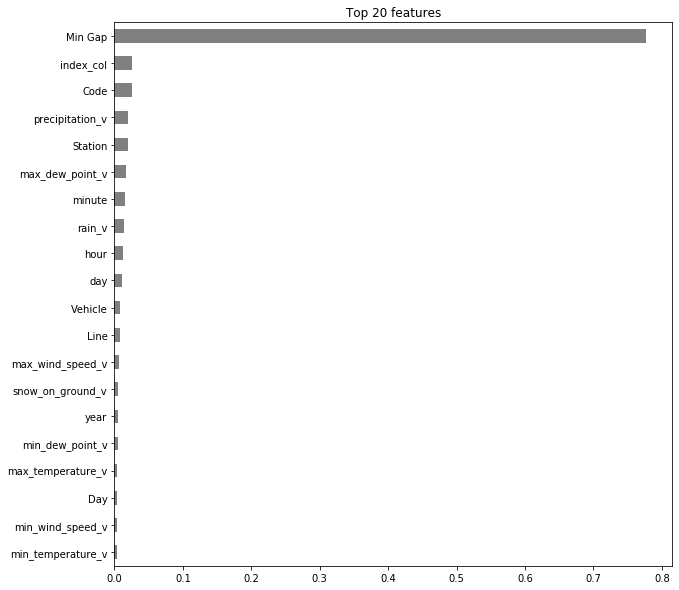

In [37]:
# feature importances

# get feature importances
rf = pipeline.named_steps['randomforestregressor']

importances = pd.Series(rf.feature_importances_, X_train.columns)

# plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [38]:
# Looking at Min Gap specifically for leakage

column  = 'Min Gap'

# Fit with column
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names='True'), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Fit without column
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names='True'), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy with Min Gap: 0.8812326990572698


KeyboardInterrupt: 

In [ ]:
# permutation importances

transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

# this runs predict() on each feature

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, n_iter=2, random_state=42
)

permuter.fit(X_val_transformed, y_val)

feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features
    feature_names=feature_names
)

## Partial dependence plot (with two features)

In [ ]:
# reduce to two features only
features = ['Min Gap', 'day']

# pdp
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# make pipeline & fit model
rf = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
) 

rf.fit(X_train, y_train)

# pdp
interaction = pdp_interact(
    model=rf, 
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);
# save this as a pic for Plotly, rather than dynamically

## 3D graph

In [ ]:
import plotly.graph_objs as go

pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending


surface = go.Surface(x=pdp.columns, 
                     y=pdp.index, 
                     z=pdp.values)

fig = go.Figure(surface)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig.show()

## Partial dependence plot (with categorical features)

In [ ]:
target = 'Min Delay'
features = train.columns.drop(['Min Delay'])

# Use ordinal
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X_train)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y_train)

In [ ]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'Day'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [ ]:
features = ['Day', 'year']

from pdpbox.pdp import pdp_interact, pdp_interact_plot

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

## Shapley force plot to explain one prediction + hyperparameter tuning
If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.

In [ ]:
val.columns

In [ ]:
# Save the ids for later, so we can look up actual results,
# to compare with predicted results
train_id = X_train['index_col']
val_id = X_val['index_col']
test_id = X_test['index_col']

In [ ]:
features = ['day', 'year', 'Min Gap']
target = 'Min Delay'
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [ ]:
# hyperparameter tuning 

from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

In [ ]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

In [ ]:
# define predict function
import shap

def predict(day, year, gap):
    df = pd.DataFrame(
        data=[[day, year, gap]],
        columns=['day', 'year', 'Min Gap']
    )
    pred = model.predict(df)[0]
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(df)
    
    feature_names = df.columns
    feature_values = df.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    
    result = f'Delayed time is estimated at {pred:,.0f} minutes for the Toronto subway. \n\n'
    result += f'Starting from a baseline of {explainer.expected_value:,.0f} minutes. \n'
    result += shaps.to_string()
    print(result)
        
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values,
        features=df
    )

predict(day=1, year=2016, gap=5)

## Deploying

In [ ]:
X = df[['year', 'Code']]
y = df['Min Delay']

pipeline = make_pipeline(
    ce.OrdinalEncoder(), # trees work better with ordinal encoding
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X, y)

def predict(year, Code):
    df = pd.DataFrame(
        columns=['year', 'Code'],
        data=[[year, Code]]
    )
    y_pred = pipeline.predict(df)[0]
    return f'{y_pred:.0f} minutes'

In [ ]:
predict(year=2018, Code='MUSC')

In [ ]:
from joblib import dump
dump(pipeline, 'pipeline.joblib')